In [ ]:
# Creating a controlled-U gate from any given unitary U

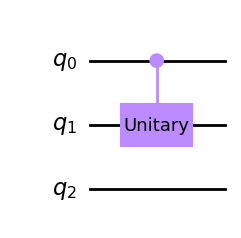

In [27]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info import Operator
import numpy as np

# Define the 2x2 unitary matrix
unitary_matrix = np.array([[1, 0], [0, np.exp(1j * np.pi / 4)]]) # T-gate

# Create a QuantumCircuit
qc = QuantumCircuit(3)

# Convert the unitary matrix to a QuantumCircuit object
op = Operator(unitary_matrix)

# Define a custom gate from the unitary matrix
custom_gate = op.to_instruction()

# Apply the controlled operation to the quantum circuit with control qubit 0 and target qubit 1
qc.append(custom_gate.control(), [0, 1])

# Draw the circuit
qc.draw()

In [42]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit import Aer, transpile, assemble
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# import basic plot tools and circuits
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Operator

# Create and set up circuit
qpe = QuantumCircuit(4, 3)

# Define the 2x2 unitary matrix
A = np.array([[1, 0], [0, np.exp(1j * np.pi / 4)]]) # T-gate
unitary_matrix = A
print(A) # Print matrix

# Calculate eigenvalues and eigenvectors
Eval, Evec = np.linalg.eig(A) 
print(Evec) # Print eigenvectors

[[1.        +0.j         0.        +0.j        ]
 [0.        +0.j         0.70710678+0.70710678j]]
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]


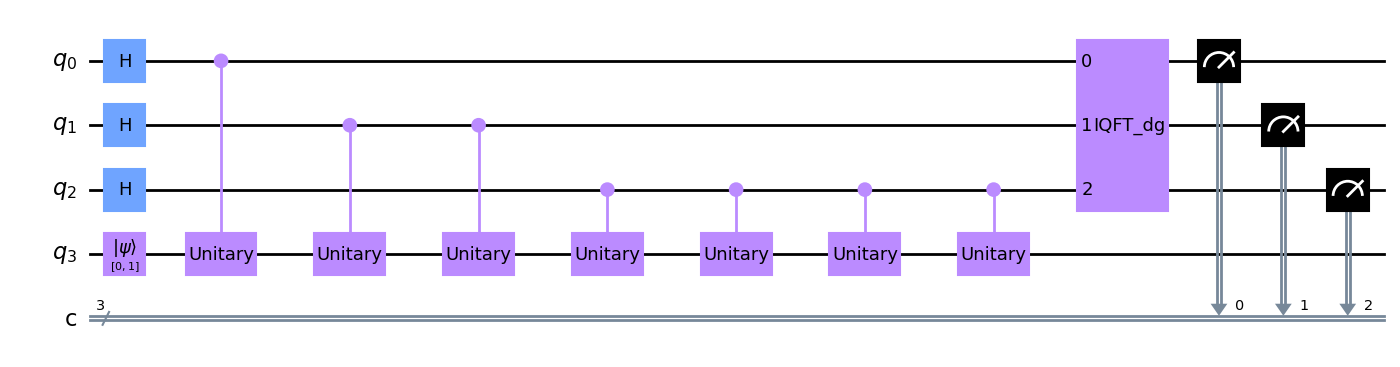

In [43]:
# Convert the unitary matrix to a QuantumCircuit object
op = Operator(unitary_matrix)

# Define a custom gate from the unitary matrix
custom_gate = op.to_instruction()

# Apply H-Gates to counting qubits:
for qubit in range(3):
    qpe.h(qubit)

# Prepare the 4th qubit as our eigenstate |psi> = |1>:
psi = Evec[:, 1]
qpe.initialize(psi, 3)

# Do the controlled-U operations:
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.append(custom_gate.control(), [counting_qubit, 3])
    repetitions *= 2

# Do the inverse QFT:
qpe = qpe.compose(QFT(3, inverse=True), range(3))

# Measure of course!
for n in range(3):
    qpe.measure(n,n)

qpe.draw()

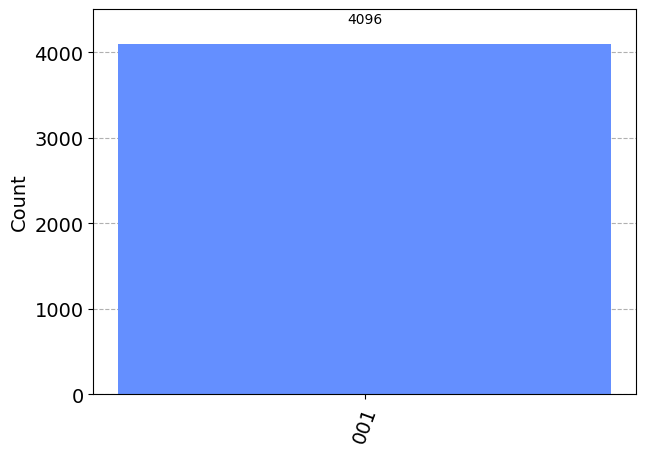

In [44]:
# Let's see the results!
aer_sim = Aer.get_backend('aer_simulator')
shots = 4096
t_qpe = transpile(qpe, aer_sim)
results = aer_sim.run(t_qpe, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

In [45]:
# Now check for psi = |0>

In [46]:
# Create and set up circuit
qpe = QuantumCircuit(4, 3)

# Define the 2x2 unitary matrix
A = np.array([[1, 0], [0, np.exp(1j * np.pi / 4)]]) # T-gate
unitary_matrix = A
print(A) # Print matrix

# Calculate eigenvalues and eigenvectors
Eval, Evec = np.linalg.eig(A) 
print(Evec) # Print eigenvectors

[[1.        +0.j         0.        +0.j        ]
 [0.        +0.j         0.70710678+0.70710678j]]
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]


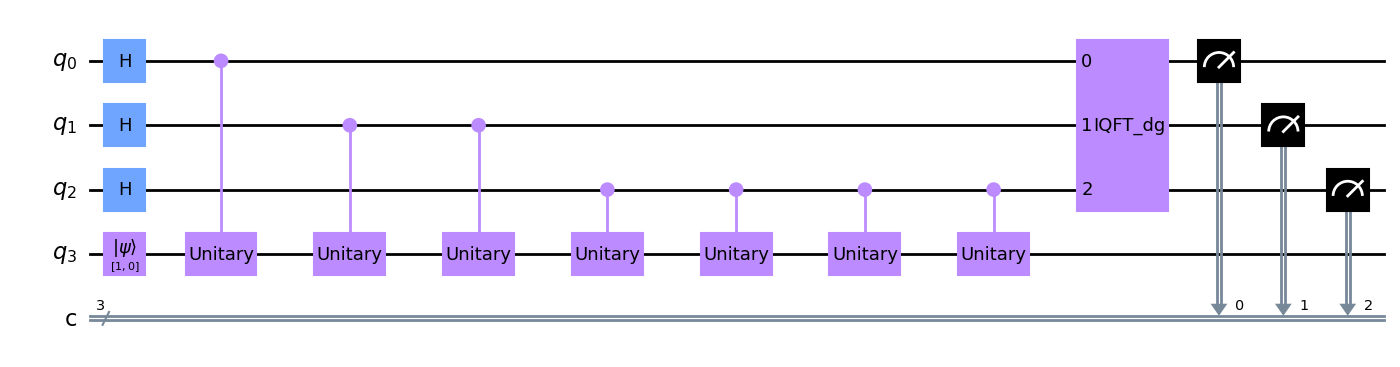

In [47]:
# Convert the unitary matrix to a QuantumCircuit object
op = Operator(unitary_matrix)

# Define a custom gate from the unitary matrix
custom_gate = op.to_instruction()

# Apply H-Gates to counting qubits:
for qubit in range(3):
    qpe.h(qubit)

# Prepare the 4th qubit as our eigenstate |psi> = |0>:
psi = Evec[:, 0]
qpe.initialize(psi, 3)

# Do the controlled-U operations:
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.append(custom_gate.control(), [counting_qubit, 3])
    repetitions *= 2

# Do the inverse QFT:
qpe = qpe.compose(QFT(3, inverse=True), range(3))

# Measure of course!
for n in range(3):
    qpe.measure(n,n)

qpe.draw()

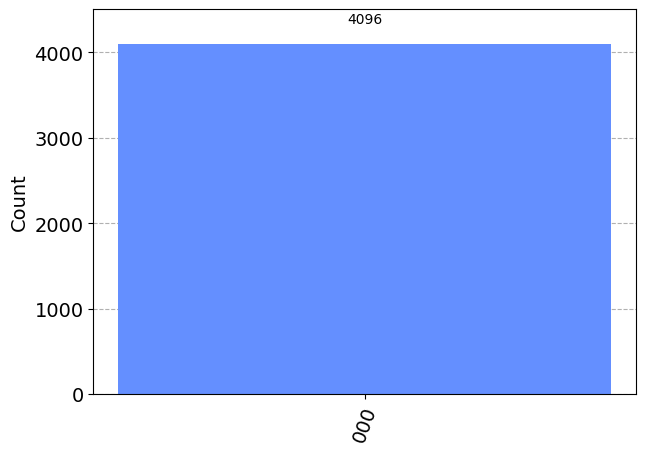

In [48]:
# Let's see the results!
aer_sim = Aer.get_backend('aer_simulator')
shots = 4096
t_qpe = transpile(qpe, aer_sim)
results = aer_sim.run(t_qpe, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

In [49]:
# Let us check for another unitary

In [50]:
# Create and set up circuit
qpe = QuantumCircuit(4, 3)

# Define the 2x2 unitary matrix
A = np.array([[1, 0], [0, np.exp(2j * np.pi / 3)]])
unitary_matrix = A
print(A) # Print matrix

# Calculate eigenvalues and eigenvectors
Eval, Evec = np.linalg.eig(A) 
print(Evec) # Print eigenvectors

[[ 1. +0.j         0. +0.j       ]
 [ 0. +0.j        -0.5+0.8660254j]]
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]


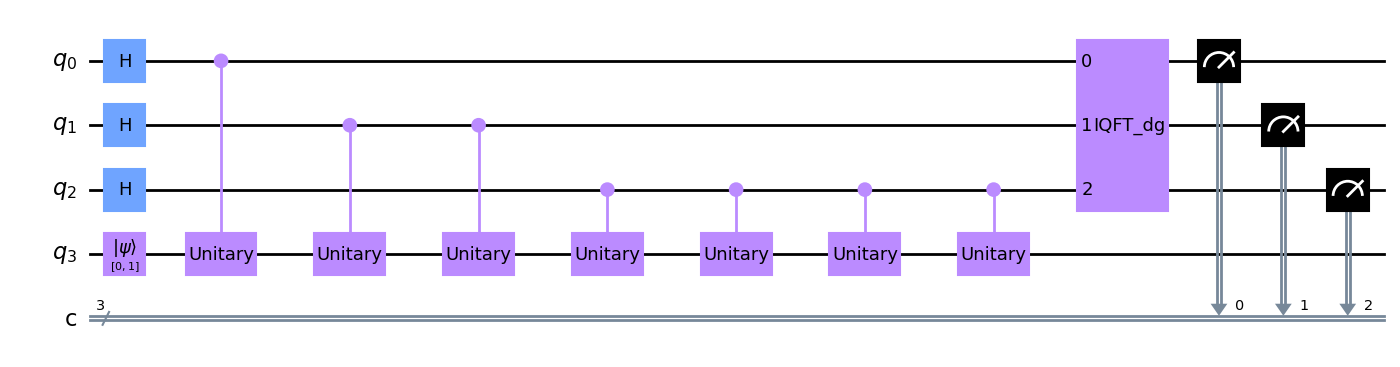

In [51]:
# Convert the unitary matrix to a QuantumCircuit object
op = Operator(unitary_matrix)

# Define a custom gate from the unitary matrix
custom_gate = op.to_instruction()

# Apply H-Gates to counting qubits:
for qubit in range(3):
    qpe.h(qubit)

# Prepare the 4th qubit as our eigenstate |psi> = |1>:
psi = Evec[:, 1]
qpe.initialize(psi, 3)

# Do the controlled-U operations:
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.append(custom_gate.control(), [counting_qubit, 3])
    repetitions *= 2

# Do the inverse QFT:
qpe = qpe.compose(QFT(3, inverse=True), range(3))

# Measure of course!
for n in range(3):
    qpe.measure(n,n)

qpe.draw()

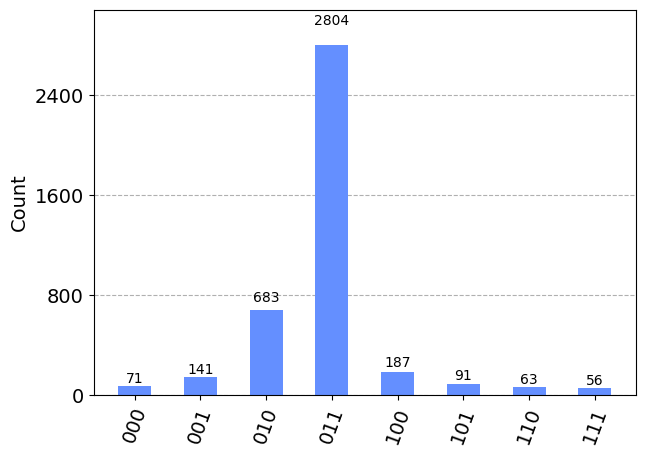

In [52]:
# Let's see the results!
aer_sim = Aer.get_backend('aer_simulator')
shots = 4096
t_qpe = transpile(qpe, aer_sim)
results = aer_sim.run(t_qpe, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

In [1]:
# Let us check for another unitary

In [18]:
# Create and set up circuit
qpe = QuantumCircuit(4, 3)

# Define the 2x2 unitary matrix
A = (1 / np.sqrt(2)) * np.array([[1, 1j], [1j, 1]])
unitary_matrix = A
print(A) # Print matrix

# Calculate eigenvalues and eigenvectors
Eval, Evec = np.linalg.eig(A) 
print(Evec) # Print eigenvectors

[[0.70710678+0.j         0.        +0.70710678j]
 [0.        +0.70710678j 0.70710678+0.j        ]]
[[ 0.70710678+0.00000000e+00j  0.70710678+0.00000000e+00j]
 [ 0.70710678+0.00000000e+00j -0.70710678-2.77555756e-16j]]


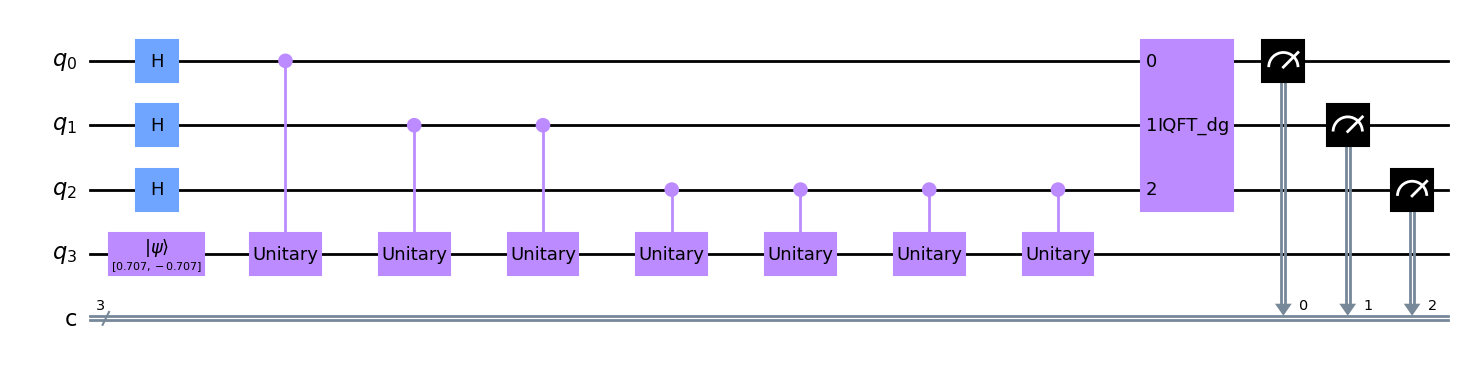

In [19]:
# Convert the unitary matrix to a QuantumCircuit object
op = Operator(unitary_matrix)

# Define a custom gate from the unitary matrix
custom_gate = op.to_instruction()

# Apply H-Gates to counting qubits:
for qubit in range(3):
    qpe.h(qubit)

# Prepare the 4th qubit as our eigenstate |psi> = second eigenvector:
psi = Evec[:, 1]
qpe.initialize(psi, 3)

# Do the controlled-U operations:
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.append(custom_gate.control(), [counting_qubit, 3])
    repetitions *= 2

# Do the inverse QFT:
qpe = qpe.compose(QFT(3, inverse=True), range(3))

# Measure of course!
for n in range(3):
    qpe.measure(n,n)

qpe.draw()

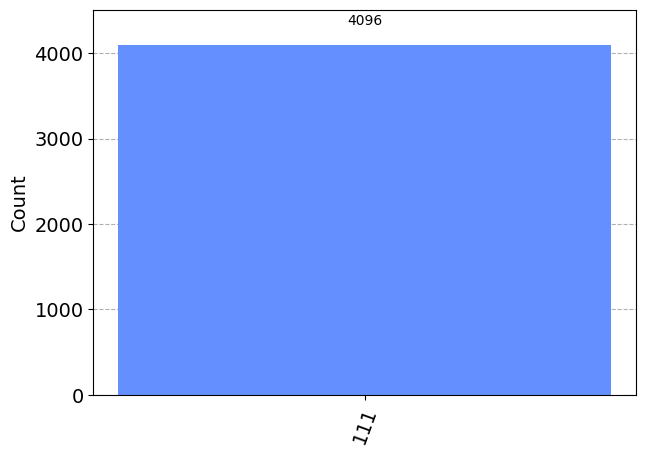

In [20]:
# Let's see the results!
aer_sim = Aer.get_backend('aer_simulator')
shots = 4096
t_qpe = transpile(qpe, aer_sim)
results = aer_sim.run(t_qpe, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

In [1]:
# Let us check for another eigen vector

In [2]:
# Create and set up circuit
qpe = QuantumCircuit(4, 3)

# Define the 2x2 unitary matrix
A = (1 / np.sqrt(2)) * np.array([[1, 1j], [1j, 1]])
unitary_matrix = A
print(A) # Print matrix

# Calculate eigenvalues and eigenvectors
Eval, Evec = np.linalg.eig(A) 
print(Evec) # Print eigenvectors

[[0.70710678+0.j         0.        +0.70710678j]
 [0.        +0.70710678j 0.70710678+0.j        ]]
[[ 0.70710678+0.00000000e+00j  0.70710678+0.00000000e+00j]
 [ 0.70710678+0.00000000e+00j -0.70710678-2.77555756e-16j]]


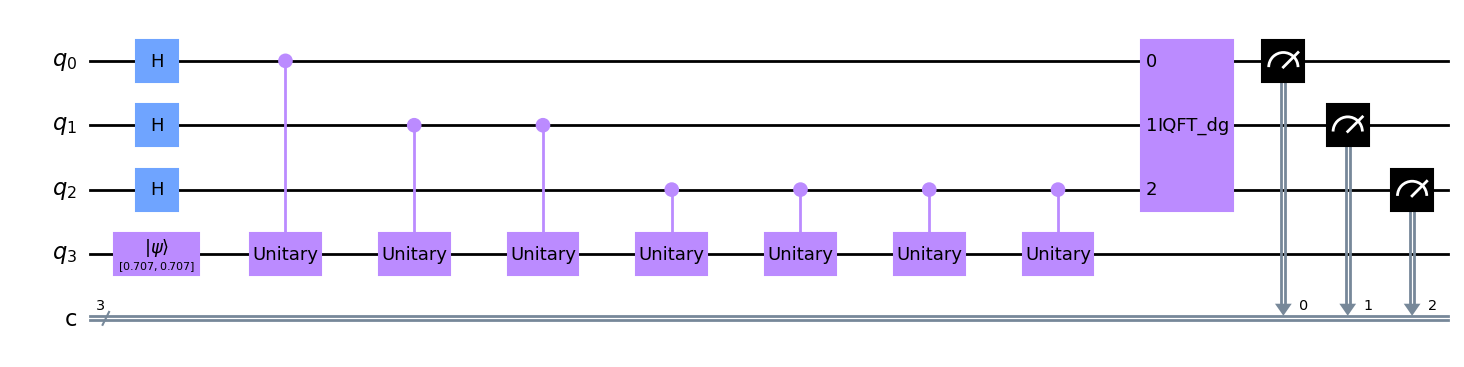

In [3]:
# Convert the unitary matrix to a QuantumCircuit object
op = Operator(unitary_matrix)

# Define a custom gate from the unitary matrix
custom_gate = op.to_instruction()

# Apply H-Gates to counting qubits:
for qubit in range(3):
    qpe.h(qubit)

# Prepare the 4th qubit as our eigenstate |psi> = first eigenvector:
psi = Evec[:, 0]
qpe.initialize(psi, 3)

# Do the controlled-U operations:
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.append(custom_gate.control(), [counting_qubit, 3])
    repetitions *= 2

# Do the inverse QFT:
qpe = qpe.compose(QFT(3, inverse=True), range(3))

# Measure of course!
for n in range(3):
    qpe.measure(n,n)

qpe.draw()

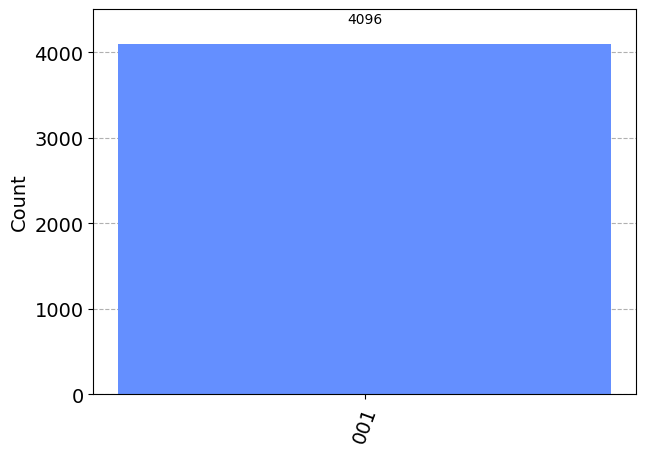

In [4]:
# Let's see the results!
aer_sim = Aer.get_backend('aer_simulator')
shots = 4096
t_qpe = transpile(qpe, aer_sim)
results = aer_sim.run(t_qpe, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

In [5]:
# Let us check for another unitary

In [6]:
# Create and set up circuit
qpe = QuantumCircuit(4, 3)

# Define the 2x2 unitary matrix
A = (1 / np.sqrt(3)) * np.array([[1, 1 + 1j], [1 - 1j, -1]])
unitary_matrix = A
print(A) # Print matrix

# Calculate eigenvalues and eigenvectors
Eval, Evec = np.linalg.eig(A) 
print(Evec) # Print eigenvectors

[[ 0.57735027+0.j          0.57735027+0.57735027j]
 [ 0.57735027-0.57735027j -0.57735027+0.j        ]]
[[ 0.88807383+0.j         -0.32505758-0.32505758j]
 [ 0.32505758-0.32505758j  0.88807383+0.j        ]]


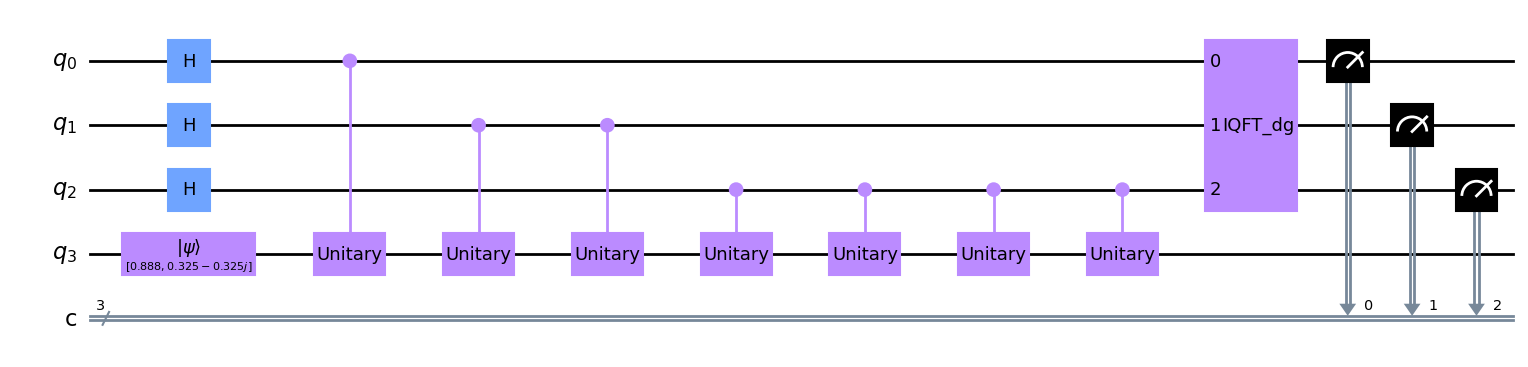

In [7]:
# Convert the unitary matrix to a QuantumCircuit object
op = Operator(unitary_matrix)

# Define a custom gate from the unitary matrix
custom_gate = op.to_instruction()

# Apply H-Gates to counting qubits:
for qubit in range(3):
    qpe.h(qubit)

# Prepare the 4th qubit as our eigenstate |psi> = first eigenvector:
psi = Evec[:, 0]
qpe.initialize(psi, 3)

# Do the controlled-U operations:
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.append(custom_gate.control(), [counting_qubit, 3])
    repetitions *= 2

# Do the inverse QFT:
qpe = qpe.compose(QFT(3, inverse=True), range(3))

# Measure of course!
for n in range(3):
    qpe.measure(n,n)

qpe.draw()

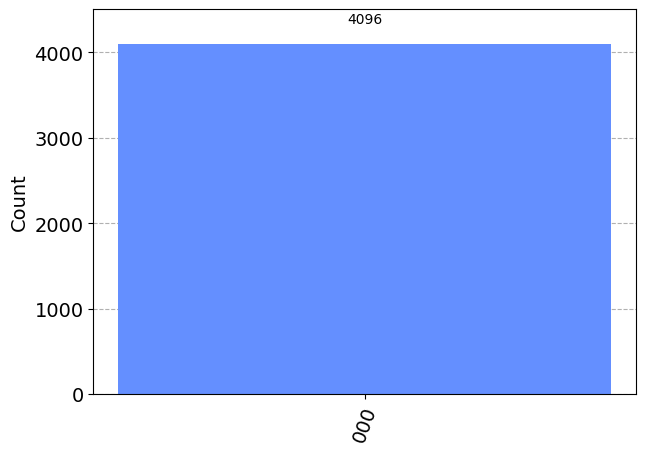

In [8]:
# Let's see the results!
aer_sim = Aer.get_backend('aer_simulator')
shots = 4096
t_qpe = transpile(qpe, aer_sim)
results = aer_sim.run(t_qpe, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

In [9]:
# Let us check for another eigen vector

In [10]:
# Create and set up circuit
qpe = QuantumCircuit(4, 3)

# Define the 2x2 unitary matrix
A = (1 / np.sqrt(3)) * np.array([[1, 1 + 1j], [1 - 1j, -1]])
unitary_matrix = A
print(A) # Print matrix

# Calculate eigenvalues and eigenvectors
Eval, Evec = np.linalg.eig(A) 
print(Evec) # Print eigenvectors

[[ 0.57735027+0.j          0.57735027+0.57735027j]
 [ 0.57735027-0.57735027j -0.57735027+0.j        ]]
[[ 0.88807383+0.j         -0.32505758-0.32505758j]
 [ 0.32505758-0.32505758j  0.88807383+0.j        ]]


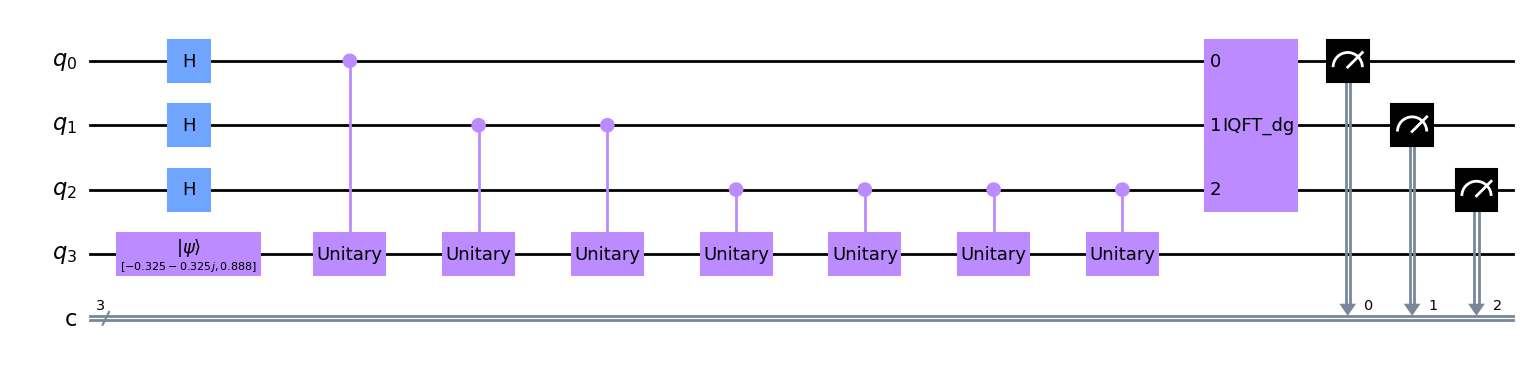

In [11]:
# Convert the unitary matrix to a QuantumCircuit object
op = Operator(unitary_matrix)

# Define a custom gate from the unitary matrix
custom_gate = op.to_instruction()

# Apply H-Gates to counting qubits:
for qubit in range(3):
    qpe.h(qubit)

# Prepare the 4th qubit as our eigenstate |psi> = second eigenvector:
psi = Evec[:, 1]
qpe.initialize(psi, 3)

# Do the controlled-U operations:
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.append(custom_gate.control(), [counting_qubit, 3])
    repetitions *= 2

# Do the inverse QFT:
qpe = qpe.compose(QFT(3, inverse=True), range(3))

# Measure of course!
for n in range(3):
    qpe.measure(n,n)

qpe.draw()

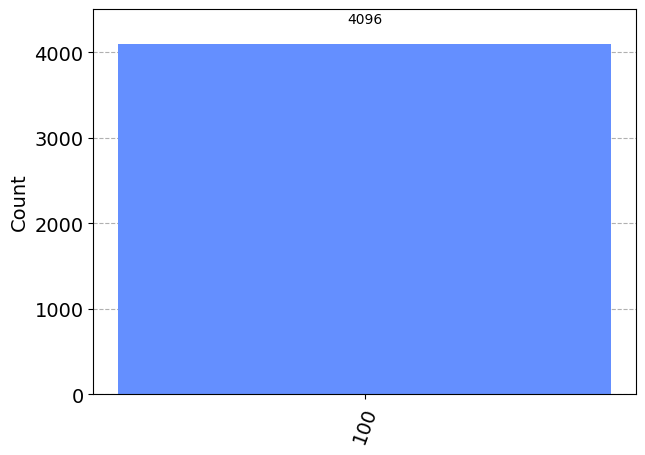

In [12]:
# Let's see the results!
aer_sim = Aer.get_backend('aer_simulator')
shots = 4096
t_qpe = transpile(qpe, aer_sim)
results = aer_sim.run(t_qpe, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)